# Proyek Analisis Data: Air Quality Guanyuan Station
- **Nama:** Shabrina Jamilah
- **Email:** shabrina.sjamilah@gmail.com
- **ID Dicoding:** shabrin

## Menentukan Pertanyaan Analisis

---



1. Bagaimana pengaruh hujan pada polusi? Apakah hujan membantu mengurangi kadar polusi di stasiun Guanyuan?
2. Kapan hujan paling sering terjadi di stasiun Guanyuan? Saat suhu rendah atau tinggi?
3. Apa penyebab utama polusi udara di stasiun Guangyuan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Data Wrangling

### Gathering Data

In [2]:
guanyuan= pd.read_csv("PRSA_Data_Guanyuan.csv")
guanyuan

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,35061,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,35062,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,35063,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


**Insight:**
- Menampilkan keseluruhan tabel dari data frame guanyuan
- Data PRSA kualitas udara di stasiun Guanyuan dari tahun 2013—2017

### Assessing Data

**Menilai data frame guanyuan**

In [3]:
guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
guanyuan.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [5]:
print("Jumlah duplikasi: ", guanyuan.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
guanyuan.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Terdapat missing values di kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM.
- Tidak ada data yang duplikat.


### Cleaning Data

**Membersihkan data frame guanyuan**

In [7]:
# Konversi tipe data kolom wd
guanyuan['wd'] = guanyuan['wd'].astype('category')

In [8]:
# Menghapus kolom yang tidak diperlukan
guanyuan.drop(columns=['No', 'station'], inplace=True)

In [9]:
# Menambahkan kolom baru
guanyuan['year'] = guanyuan['year'].astype(int)
guanyuan['month'] = guanyuan['month'].astype(int)
guanyuan['day'] = guanyuan['day'].astype(int)
guanyuan['hour'] = guanyuan['hour'].astype(int)
guanyuan['timestamp'] = pd.to_datetime(
    guanyuan[['year', 'month', 'day', 'hour']]
)
print(guanyuan[['timestamp']].head())

            timestamp
0 2013-03-01 00:00:00
1 2013-03-01 01:00:00
2 2013-03-01 02:00:00
3 2013-03-01 03:00:00
4 2013-03-01 04:00:00


In [10]:
guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   year       35064 non-null  int64         
 1   month      35064 non-null  int64         
 2   day        35064 non-null  int64         
 3   hour       35064 non-null  int64         
 4   PM2.5      34448 non-null  float64       
 5   PM10       34635 non-null  float64       
 6   SO2        34590 non-null  float64       
 7   NO2        34405 non-null  float64       
 8   CO         33311 non-null  float64       
 9   O3         33891 non-null  float64       
 10  TEMP       35044 non-null  float64       
 11  PRES       35044 non-null  float64       
 12  DEWP       35044 non-null  float64       
 13  RAIN       35044 non-null  float64       
 14  wd         34983 non-null  category      
 15  WSPM       35050 non-null  float64       
 16  timestamp  35064 non-null  datetime64[ns

**Duplicate data**

In [11]:
print("Jumlah duplikasi: ", guanyuan.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

#### **Analisis Data Secara Umum**

In [12]:
guanyuan.head(15)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,timestamp
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00
5,2013,3,1,5,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,N,3.7,2013-03-01 05:00:00
6,2013,3,1,6,6.0,6.0,6.0,20.0,400.0,66.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,2013-03-01 06:00:00
7,2013,3,1,7,3.0,3.0,7.0,26.0,400.0,61.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,2013-03-01 07:00:00
8,2013,3,1,8,3.0,6.0,9.0,37.0,500.0,50.0,0.1,1028.3,-19.2,0.0,NNW,4.1,2013-03-01 08:00:00
9,2013,3,1,9,7.0,11.0,9.0,30.0,400.0,58.0,1.2,1028.5,-19.3,0.0,N,2.6,2013-03-01 09:00:00


In [13]:
guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   year       35064 non-null  int64         
 1   month      35064 non-null  int64         
 2   day        35064 non-null  int64         
 3   hour       35064 non-null  int64         
 4   PM2.5      34448 non-null  float64       
 5   PM10       34635 non-null  float64       
 6   SO2        34590 non-null  float64       
 7   NO2        34405 non-null  float64       
 8   CO         33311 non-null  float64       
 9   O3         33891 non-null  float64       
 10  TEMP       35044 non-null  float64       
 11  PRES       35044 non-null  float64       
 12  DEWP       35044 non-null  float64       
 13  RAIN       35044 non-null  float64       
 14  wd         34983 non-null  category      
 15  WSPM       35050 non-null  float64       
 16  timestamp  35064 non-null  datetime64[ns

In [14]:
guanyuan.describe().style.background_gradient(cmap="Reds")

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,timestamp
count,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496,2015-03-01 11:30:00
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 11:30:00
75%,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-29 17:15:00
max,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-28 23:00:00
std,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071,nan


In [15]:
groupping = guanyuan.groupby(['day'])[['month', 'year', 'hour', 'PM2.5']].max().sort_values(by='PM2.5', ascending=False).nlargest(columns=['PM2.5'], n=20)
groupping

,month,year,hour,PM2.5
day,,,,
1,12,2017,23,680.0
28,12,2017,23,664.0
8,12,2017,23,639.0
30,12,2017,23,637.0
25,12,2017,23,635.0
16,12,2017,23,603.0
15,12,2017,23,558.0
14,12,2017,23,539.0
3,12,2017,23,526.0


In [16]:
groupping = guanyuan.groupby(['day'])[['month', 'year', 'hour', 'PM10']].max().sort_values(by='PM10', ascending=False).nlargest(columns=['PM10'], n=20)
groupping

,month,year,hour,PM10
day,,,,
29,12,2017,23,999.0
9,12,2017,23,987.0
15,12,2017,23,961.0
28,12,2017,23,917.0
5,12,2017,23,906.0
17,12,2017,23,814.0
4,12,2017,23,813.0
19,12,2017,23,807.0
8,12,2017,23,802.0


**Insight:**
- Nilai maksimum konsentrasi polutan PM2.5 adalah: 680.0
- Nilai maksimum konsentrasi polutan PM10 adalah: 999.0

#### **Analisis Polutan**

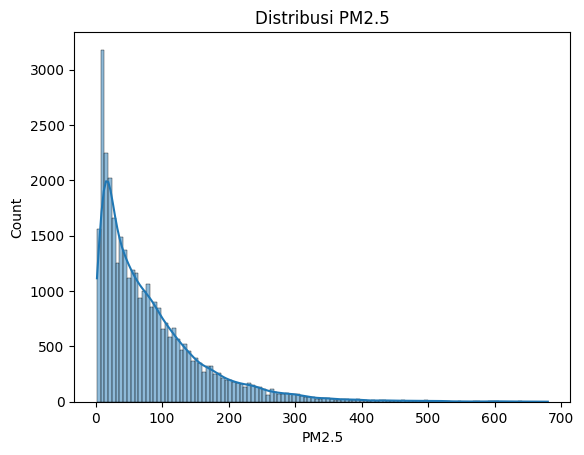

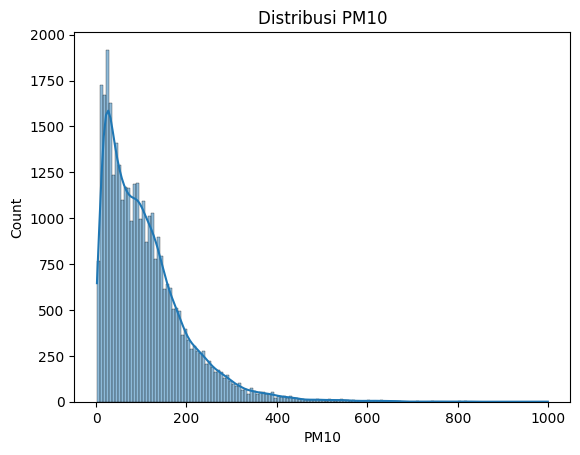

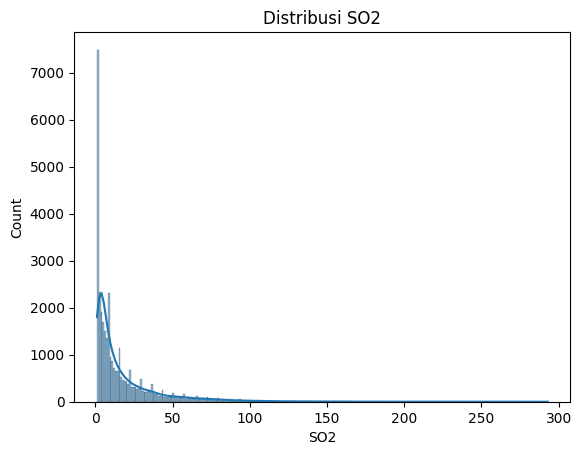

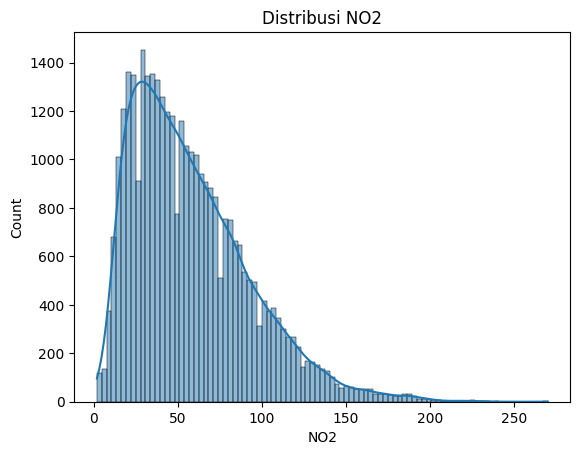

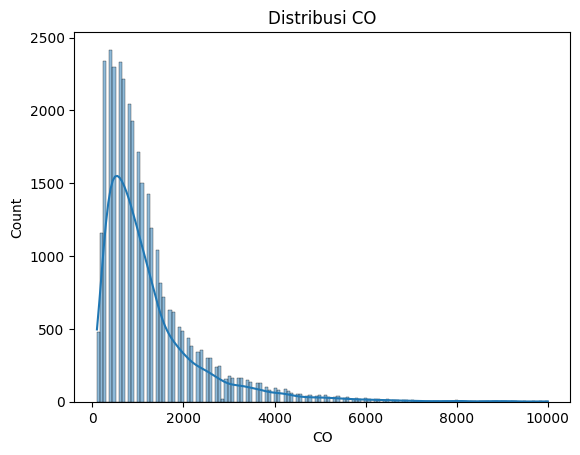

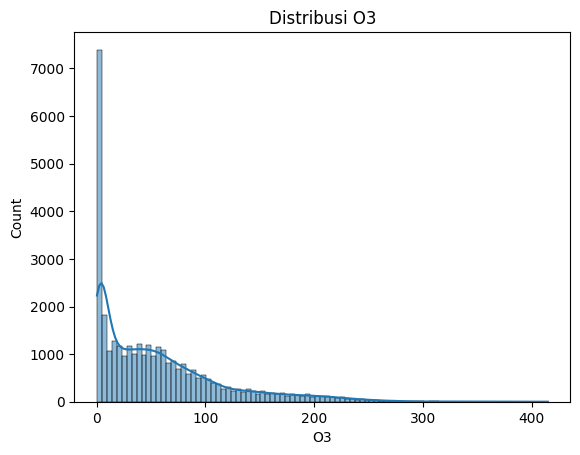

In [17]:
#Distribusi Polutan Utama
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

for pollutant in pollutants:
    sns.histplot(guanyuan[pollutant].dropna(), kde=True)
    plt.title(f'Distribusi {pollutant}')
    plt.show()

**Insight:**
- Distribusi polutan yang condong ke kiri (skewed), menunjukkan banyak nilai atau level polutan tinggi yang jarang terjadi.

#### **Analisis Parameter Cuaca**

In [18]:
# Hitung jumlah kejadian hujan (RAIN > 0)
rain_events = guanyuan[guanyuan['RAIN'] > 0].shape[0]

# Total data untuk persentase
total_rows = guanyuan.shape[0]

# Persentase kejadian hujan
rain_percentage = (rain_events / total_rows) * 100

print(f"Jumlah kejadian hujan: {rain_events}")
print(f"Persentase kejadian hujan: {rain_percentage:.2f}%")


Jumlah kejadian hujan: 1380
Persentase kejadian hujan: 3.94%


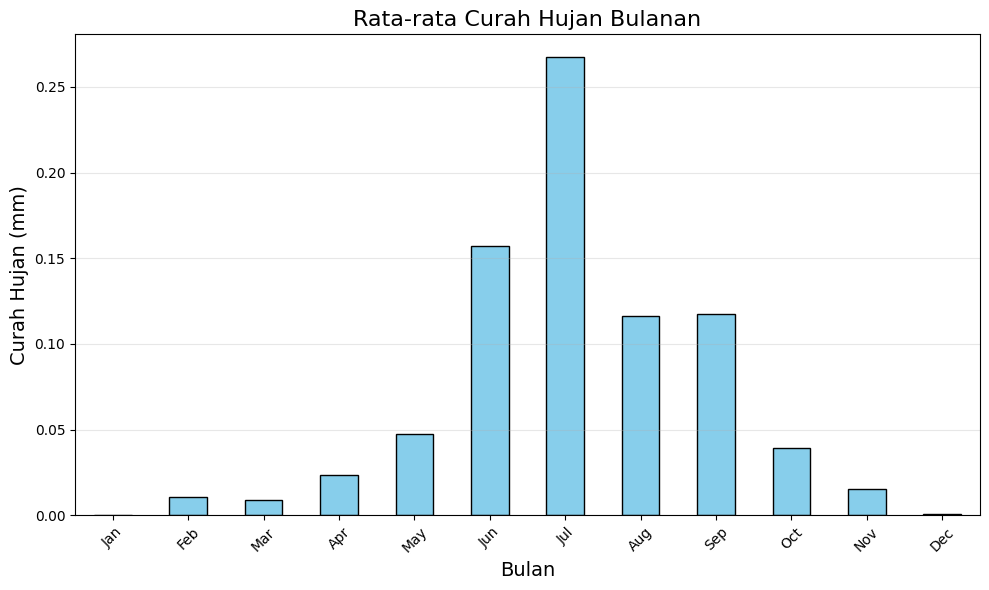

In [19]:
# Buat rata-rata curah hujan per bulan
rain_by_month = guanyuan.groupby('month')['RAIN'].mean()

# Visualisasi distribusi
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
rain_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-rata Curah Hujan Bulanan', fontsize=16)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Curah Hujan (mm)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

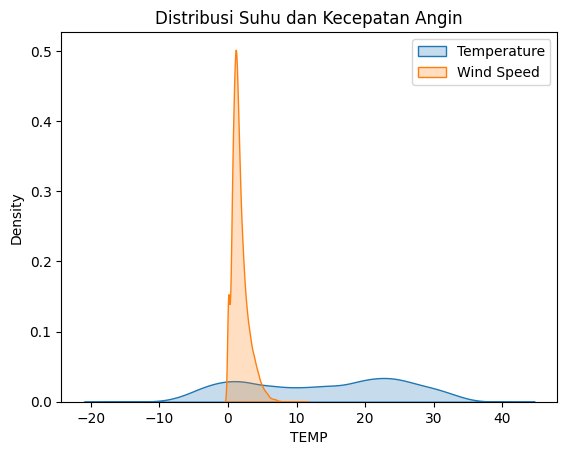

In [20]:
# Distribusi suhu dan kecepatan angin
sns.kdeplot(guanyuan['TEMP'], label='Temperature', fill=True)
sns.kdeplot(guanyuan['WSPM'], label='Wind Speed', fill=True)
plt.legend()
plt.title("Distribusi Suhu dan Kecepatan Angin")
plt.show()

**Insight**
- Suhu (TEMP) memiliki distribusi yang menyebar lebih luas, mencakup nilai dari sekitar -10°C hingga lebih dari 40°C dengan puncak distribusi berada di rentang 0°C hingga 20°C.

- Kecepatan angin (WSPM) menunjukkan distribusi yang sangat sempit, dengan puncak yang tajam di sekitar 0-5 m/s yang menunjukkan bahwa kecepatan angin di area ini umumnya rendah dan dapat memperburuk akumulasi polutan.

#### **Analisis Parameter Angin**

<ipython-input-21-ba2042fc8ee5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=guanyuan, x='wd', order=guanyuan['wd'].value_counts().index, palette='viridis')


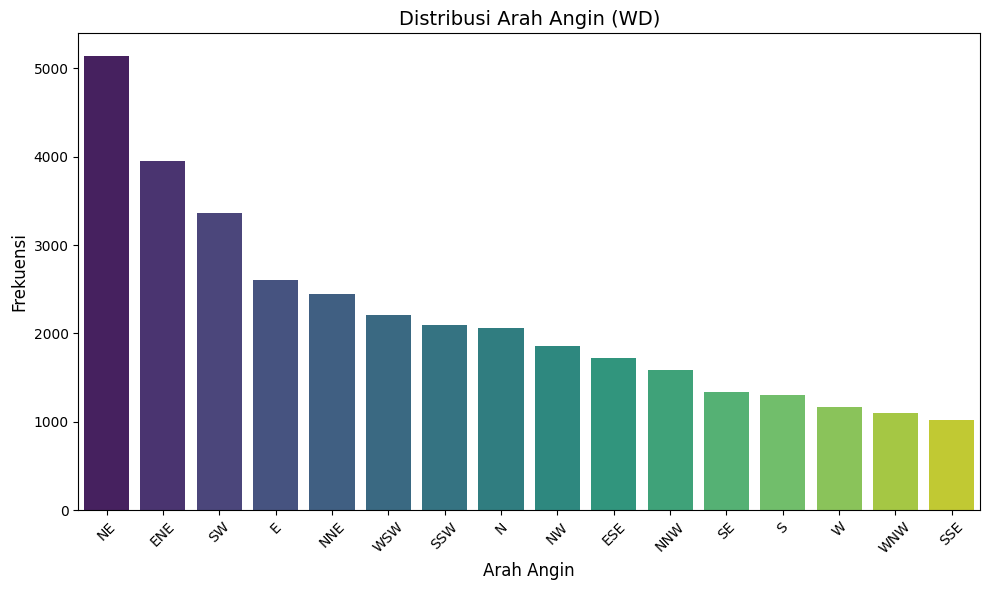

Persentase arah angin:
 wd
NE     14.692851
ENE    11.291199
SW      9.601807
E       7.455050
NNE     6.989109
WSW     6.323071
SSW     5.997199
N       5.905726
NW      5.316868
ESE     4.908098
NNW     4.542206
SE      3.833290
S       3.727525
W       3.347340
WNW     3.147243
SSE     2.921419
Name: proportion, dtype: float64


In [21]:
# Bar plot untuk distribusi arah angin
plt.figure(figsize=(10, 6))
sns.countplot(data=guanyuan, x='wd', order=guanyuan['wd'].value_counts().index, palette='viridis')
plt.title('Distribusi Arah Angin (WD)', fontsize=14)
plt.xlabel('Arah Angin', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Persentase distribusi arah angin
wd_percent = guanyuan['wd'].value_counts(normalize=True) * 100
print("Persentase arah angin:\n", wd_percent)

<ipython-input-22-70c5f7963430>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wd_monthly = guanyuan.groupby(['day', 'wd']).size().unstack(fill_value=0)


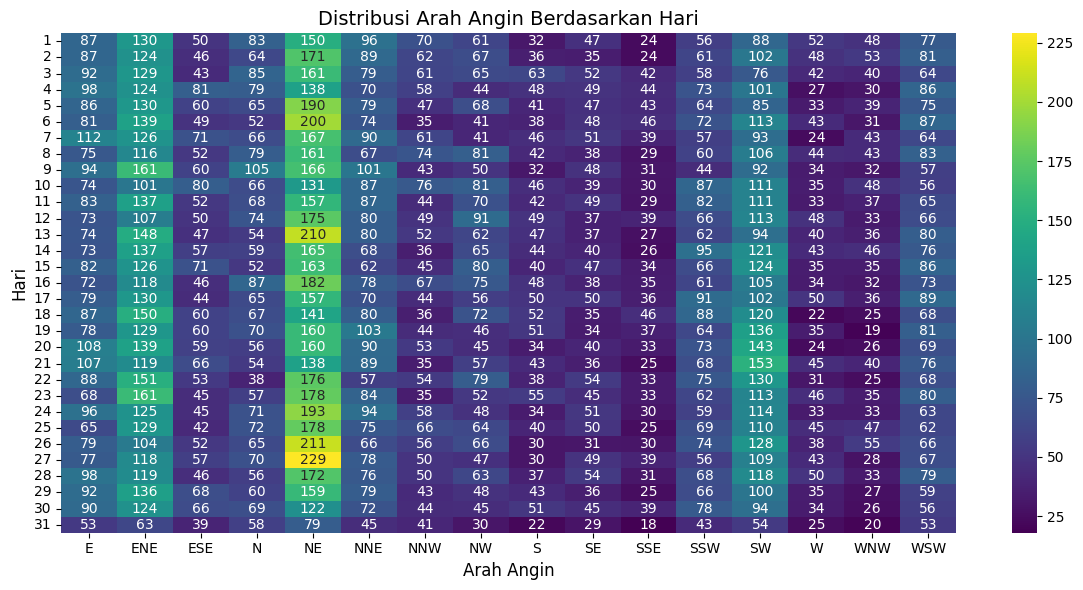

In [22]:
# Frekuensi arah angin berdasarkan hari
wd_monthly = guanyuan.groupby(['day', 'wd']).size().unstack(fill_value=0)

# Visualisasi heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(wd_monthly, cmap='viridis', annot=True, fmt='d')
plt.title('Distribusi Arah Angin Berdasarkan Hari', fontsize=14)
plt.xlabel('Arah Angin', fontsize=12)
plt.ylabel('Hari', fontsize=12)
plt.tight_layout()
plt.show()


**Insight**
- Arah angin NE (Timur Laut) yang paling sering terjadi dengan persentase 14.89%, diikuti oleh ENE (Timur-Timur Laut) sebesar 11.27%.
- Tidak ada pola harian yang benar-benar konsisten untuk semua arah angin. Frekuensi angin cenderung fluktuatif dari hari ke hari, meskipun beberapa arah seperti NE  dan ENE memiliki nilai yang cukup stabil di atas rata-rata.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh hujan pada polusi? Apakah hujan membantu mengurangi kadar polusi?

Mean Pollution Levels:
                    PM2.5        PM10
rain_category                       
Hujan          66.361136   73.810868
Tidak Hujan    83.612447  110.474609


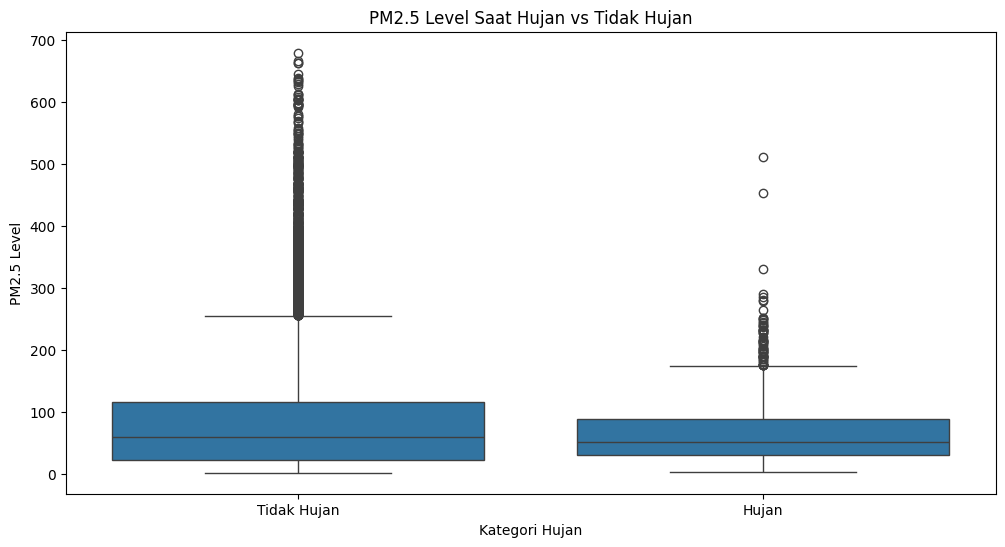

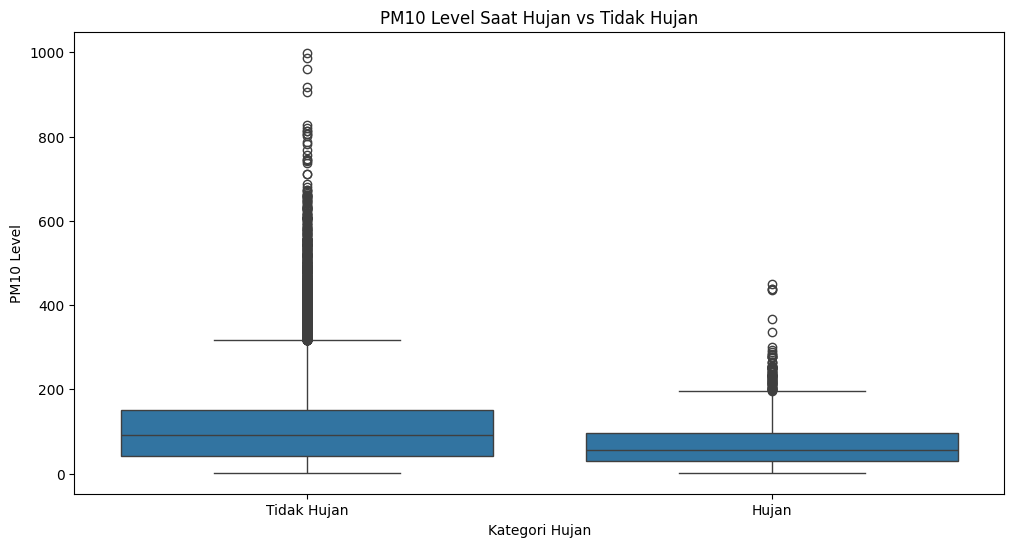

T-test Results for PM2.5: TtestResult(statistic=-7.699637112581447, pvalue=1.4009406735155316e-14, df=34446.0)
T-test Results for PM10: TtestResult(statistic=-14.572547816720448, pvalue=5.825119028514698e-48, df=34633.0)


In [23]:
# Memastikan tipe data tiap kolom sudah sesuai
guanyuan['RAIN'] = pd.to_numeric(guanyuan['RAIN'], errors='coerce')
guanyuan['PM2.5'] = pd.to_numeric(guanyuan['PM2.5'], errors='coerce')
guanyuan['PM10'] = pd.to_numeric(guanyuan['PM10'], errors='coerce')

# membuat kategori berdasarkan hujan
guanyuan['rain_category'] = guanyuan['RAIN'].apply(lambda x: 'Hujan' if x > 0 else 'Tidak Hujan')

# menghitung mean tiap kategori level polusi (PM2.5 dan PM10)
mean_pollution = guanyuan.groupby('rain_category')[['PM2.5', 'PM10']].mean()
print("Mean Pollution Levels:\n", mean_pollution)

# Visualisasi boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='rain_category', y='PM2.5', data=guanyuan)
plt.title('PM2.5 Level Saat Hujan vs Tidak Hujan')
plt.xlabel('Kategori Hujan')
plt.ylabel('PM2.5 Level')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='rain_category', y='PM10', data=guanyuan)
plt.title('PM10 Level Saat Hujan vs Tidak Hujan')
plt.xlabel('Kategori Hujan')
plt.ylabel('PM10 Level')
plt.show()

# t-test
ttest_pm25 = ttest_ind(
    guanyuan[guanyuan['rain_category'] == 'Hujan']['PM2.5'].dropna(),
    guanyuan[guanyuan['rain_category'] == 'Tidak Hujan']['PM2.5'].dropna()
)

ttest_pm10 = ttest_ind(
    guanyuan[guanyuan['rain_category'] == 'Hujan']['PM10'].dropna(),
    guanyuan[guanyuan['rain_category'] == 'Tidak Hujan']['PM10'].dropna()
)

print("T-test Results for PM2.5:", ttest_pm25)
print("T-test Results for PM10:", ttest_pm10)

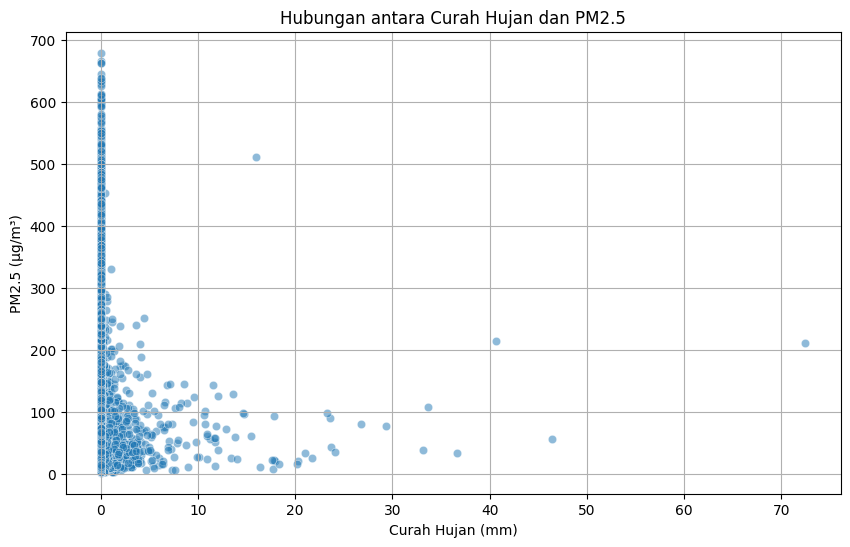

In [24]:
# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=guanyuan, x='RAIN', y='PM2.5', alpha=0.5)
plt.title('Hubungan antara Curah Hujan dan PM2.5')
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid()
plt.show()

**Insight**
- Membandingkan konsentrasi polutan sebelum dan sesudah hujan.
- Titik-titik data mengelompok di sisi kiri plot.
- Terdapat beberapa outlier dengan tingkat polutan yang tinggi bahkan pada jumlah curah hujan yang rendah.
- Curah hujan yang tinggi memiliki dampak negatif terhadap tingkat PM2.5. Hal ini menunjukkan bahwa ketika curah hujan meningkat, tingkat polutan cenderung menurun.
- Hasil T-test menunjukkan bahwa hujan berkontribusi signifikan dalam mengurangi kadar PM2.5 dan PM10 di udara.

### Pertanyaan 2: Kapan hujan paling sering terjadi di stasiun Guanyuan? Saat suhu rendah atau tinggi?

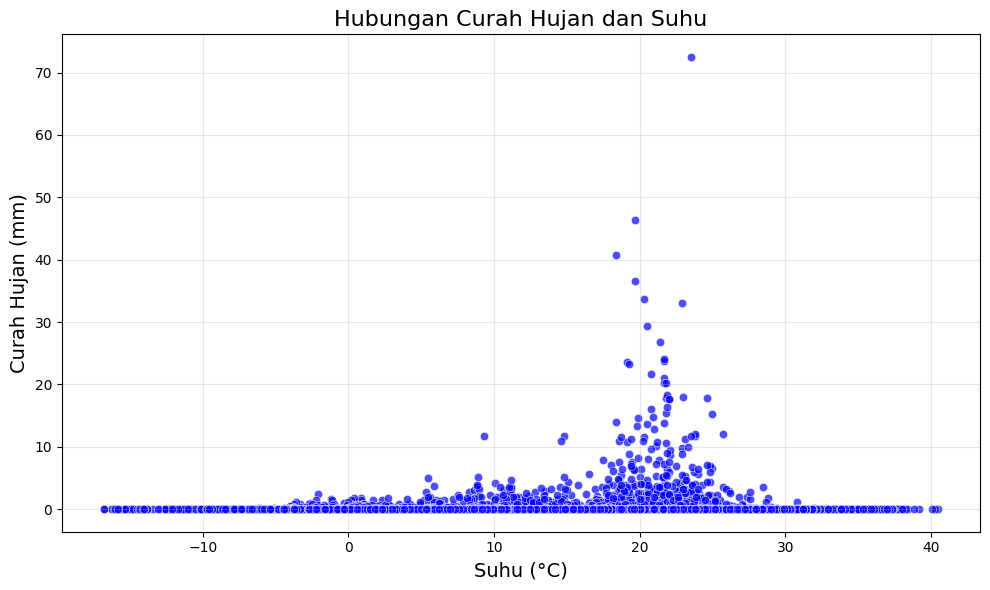

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=guanyuan, x='TEMP', y='RAIN', alpha=0.7, color='blue')
plt.title('Hubungan Curah Hujan dan Suhu', fontsize=16)
plt.xlabel('Suhu (°C)', fontsize=14)
plt.ylabel('Curah Hujan (mm)', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Insight**
- Hujan paling sering terjadi pada suhu moderat sekitar 15–25°C.
- Titik-titik pada visualisasi data menunjukkan kepadatan tertinggi curah hujan pada suhu moderat dengan beberapa puncak curah hujan signifikan (hingga sekitar 70 mm).
- Pada suhu yang sangat rendah atau sangat tinggi, curah hujan cenderung mendekati nol.

### Pertanyaan 3: Apa penyebab utama polusi udara di stasiun Guangyuan?

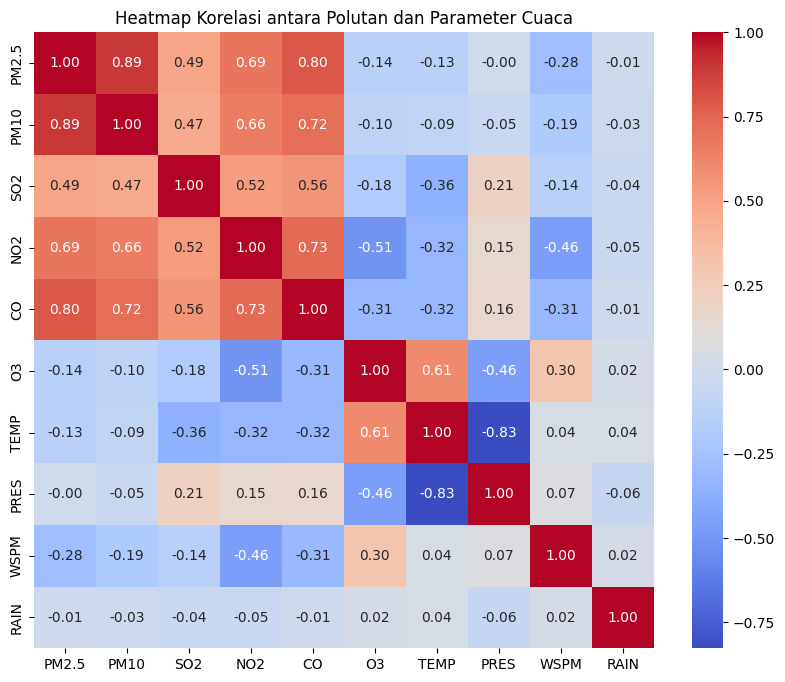

In [26]:
# Visualisasi heatmap untuk korelasi antara polutan dan parameter cuaca
corr_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'WSPM', 'RAIN']
plt.figure(figsize=(10, 8))
sns.heatmap(guanyuan[corr_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Polutan dan Parameter Cuaca')
plt.show()

<Figure size 1200x600 with 0 Axes>

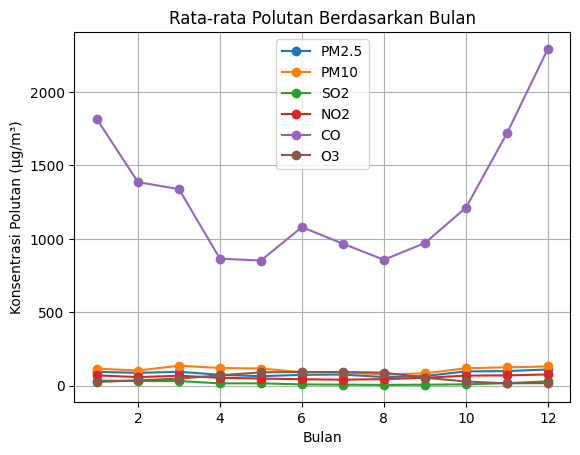

In [27]:
# Rata-rata polusi per bulan
monthly_pollution = guanyuan.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
monthly_pollution.plot(kind='line', marker='o')
plt.title('Rata-rata Polutan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

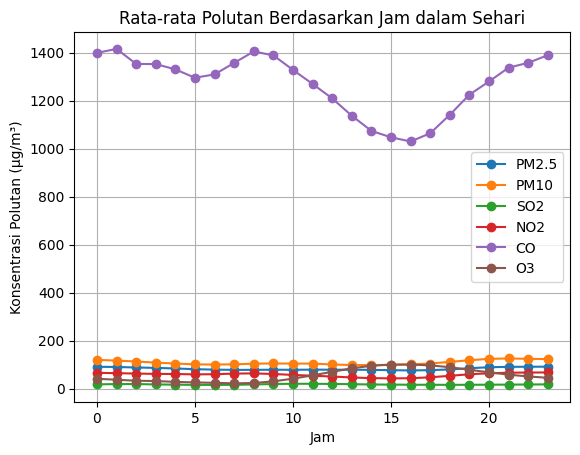

In [28]:
# Rata-rata polusi per jam
hourly_pollution = guanyuan.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Visualisasi
plt.figure(figsize=(12, 6))
hourly_pollution.plot(kind='line', marker='o')
plt.title('Rata-rata Polutan Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.grid()
plt.show()

**Insight**
- Polutan PM2.5 dan PM10 menunjukkan korelasi positif yang sangat kuat (0,89).
- Korelasi negatif antara curah hujan dan sebagian besar polutan menyoroti peran curah hujan dalam mengurangi tingkat polusi udara.
- Kecepatan angin (WSPM) memiliki korelasi negatif yang moderat dengan beberapa polutan, yang dapat dikaitkan dengan kemampuan angin untuk menyebarkan polutan.
- Konsentrasi PM2.5 dan PM10 cenderung lebih tinggi pada pagi hari (sekitar pukul 6—9) dan sore hingga malam (sekitar pukul 17—21).

## Analisis Lanjutan

Dari analisis sebelumnya diperlihatkan jika polutan PM2.5 dan PM10 dapat dikategorikan sebagai penyumbang utama tingkat kualitas udara di Guanyuan. World Health Organization (WHO) memberikan pedoman terkait batas aman untuk polusi udara, khususnya untuk parameter polutan PM2.5 dan PM10.

Pedoman WHO untuk PM2.5:
- 24 jam: ≤ 15 µg/m³ (batas aman jangka pendek)
-Tahunan: ≤ 5 µg/m³ (batas aman jangka panjang)

Pedoman WHO untuk PM10:
- 24 jam: ≤ 45 µg/m³ (batas aman jangka pendek)
- Tahunan: ≤ 15 µg/m³ (batas aman jangka panjang)

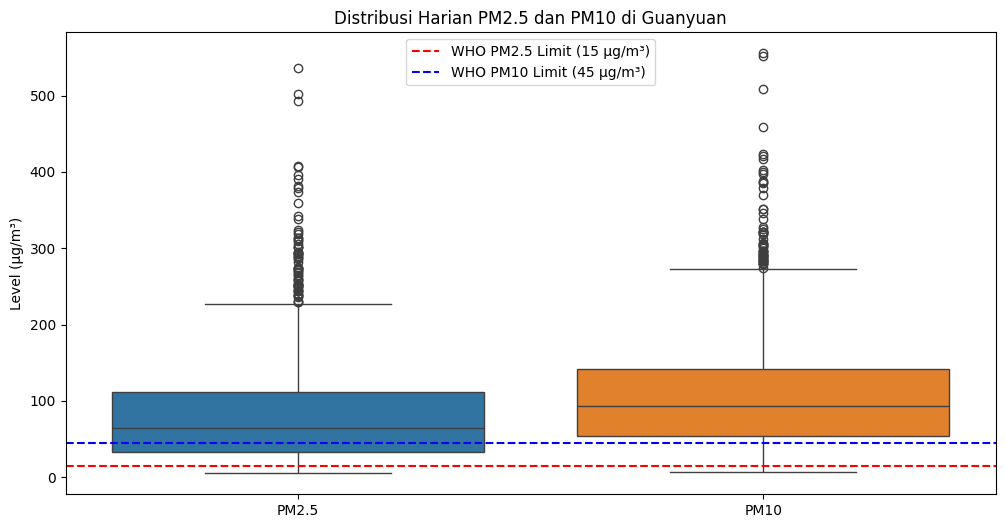

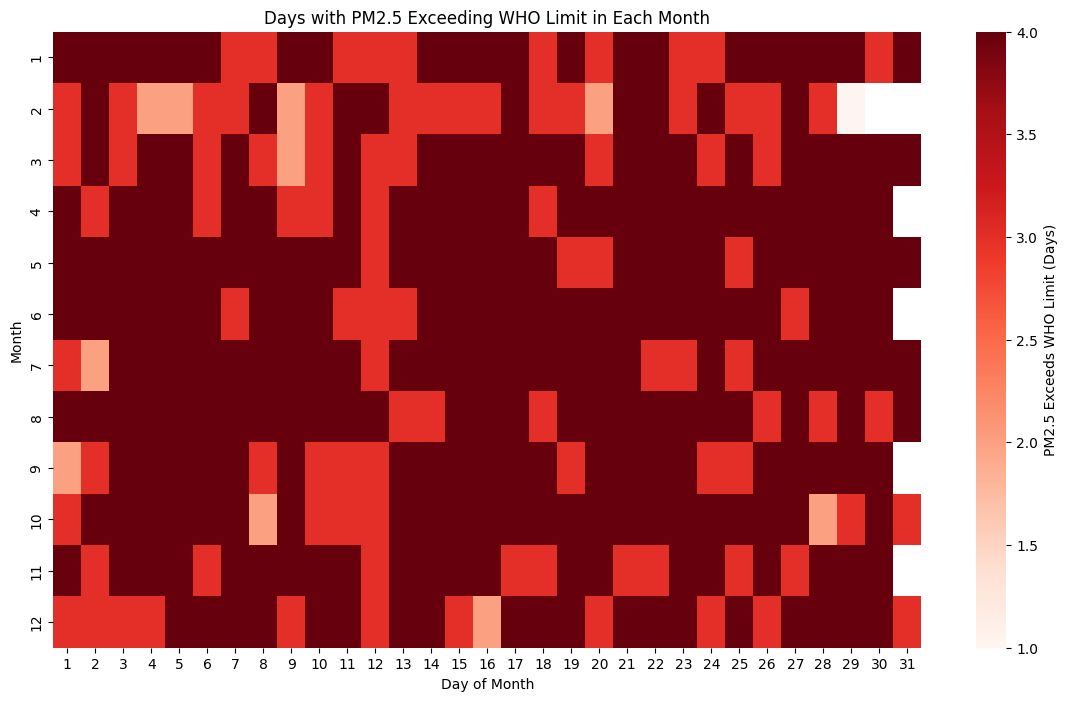

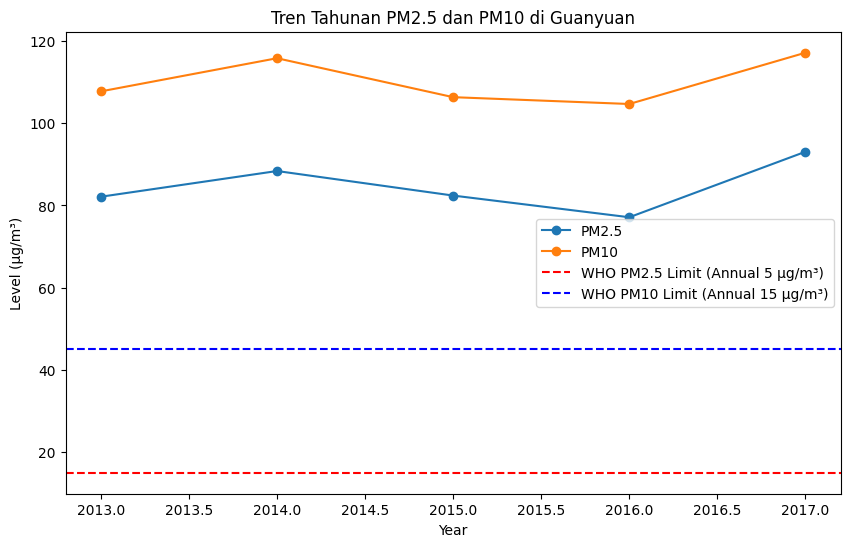

Jumlah hari PM2.5 melebihi batas WHO: 1346
Jumlah hari PM10 melebihi batas WHO: 1179


In [29]:
# Hitung rata-rata harian PM2.5 dan PM10
guanyuan_lanjutan = guanyuan.copy()
guanyuan_lanjutan['datetime'] = pd.to_datetime(guanyuan_lanjutan[['year', 'month', 'day', 'hour']])
daily_avg = guanyuan.groupby(['year', 'month', 'day'], as_index=False).agg({
    'PM2.5': 'mean',
    'PM10': 'mean'
})
daily_avg['date'] = pd.to_datetime(daily_avg[['year', 'month', 'day']])

# Bandingkan dengan ambang batas WHO
who_limits = {
    'PM2.5': 15,  # µg/m³ (24 jam)
    'PM10': 45    # µg/m³ (24 jam)
}

daily_avg['PM2.5_Exceeds_WHO'] = daily_avg['PM2.5'] > who_limits['PM2.5']
daily_avg['PM10_Exceeds_WHO'] = daily_avg['PM10'] > who_limits['PM10']

# Boxplot untuk distribusi harian PM2.5 dan PM10
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_avg[['PM2.5', 'PM10']])
plt.axhline(y=who_limits['PM2.5'], color='red', linestyle='--', label='WHO PM2.5 Limit (15 µg/m³)')
plt.axhline(y=who_limits['PM10'], color='blue', linestyle='--', label='WHO PM10 Limit (45 µg/m³)')
plt.title('Distribusi Harian PM2.5 dan PM10 di Guanyuan')
plt.ylabel('Level (µg/m³)')
plt.legend()
plt.show()

# Heatmap untuk hari-hari yang melebihi ambang batas WHO
heatmap_data = daily_avg.pivot_table(values='PM2.5_Exceeds_WHO', index='month', columns='day', aggfunc='sum')
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='Reds', cbar_kws={'label': 'PM2.5 Exceeds WHO Limit (Days)'})
plt.title('Days with PM2.5 Exceeding WHO Limit in Each Month')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()
# 3. Line chart tren tahunan
annual_avg = guanyuan_lanjutan.groupby('year', as_index=False).agg({
    'PM2.5': 'mean',
    'PM10': 'mean'
})

plt.figure(figsize=(10, 6))
plt.plot(annual_avg['year'], annual_avg['PM2.5'], marker='o', label='PM2.5')
plt.plot(annual_avg['year'], annual_avg['PM10'], marker='o', label='PM10')
plt.axhline(y=who_limits['PM2.5'], color='red', linestyle='--', label='WHO PM2.5 Limit (Annual 5 µg/m³)')
plt.axhline(y=who_limits['PM10'], color='blue', linestyle='--', label='WHO PM10 Limit (Annual 15 µg/m³)')
plt.title('Tren Tahunan PM2.5 dan PM10 di Guanyuan')
plt.xlabel('Year')
plt.ylabel('Level (µg/m³)')
plt.legend()
plt.show()

pm25_exceeds = daily_avg['PM2.5_Exceeds_WHO'].sum()
pm10_exceeds = daily_avg['PM10_Exceeds_WHO'].sum()
print(f"Jumlah hari PM2.5 melebihi batas WHO: {pm25_exceeds}")
print(f"Jumlah hari PM10 melebihi batas WHO: {pm10_exceeds}")


**Insight:**
- Tingkat PM2.5 dan PM10 secara konsisten melebihi batas aman WHO selama 2013—2017

## Conclusion

- Tercatat sumber polusi di stasiun Guanyuan berasal dari konsentrasi beberapa polutan PM2.5, PM10, SO2, NO2, CO, dan O3. Hujan memiliki efek untuk membersihkan konsentrasi polutan.
- Hujan paling sering terjadi pada suhu moderat sekitar 15–25°C.
- Hasil analisis menunjukkan bahwa konsentrasi PM2.5 dan PM10 cenderung tinggi dibandingkan polutan lain (SO2, NO2, CO, dan O3) sehingga PM2.5 dan PM10 dapat dikategorikan sebagai penyumbang utama terhadap kualitas udara di Guangyuan.
- Dari tahun 2013—2017, konsentrasi polutan PM2.5 dan PM10 selalu melebihi batas aman WHO. Tingkat PM10 umumnya lebih tinggi daripada PM2.5. Selama periode pengamatan, tidak ada tren penurunan yang jelas dalam kedua tingkat PM2.5 dan PM10. Ini menunjukkan kondisi udara Guanyuan tidak membaik.

In [31]:
guanyuan.to_csv("all_data.csv", index=False)